# DBSCAN and Hierarchical Clustering

In [47]:
#importing req libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv("C:\\Users\\Ragunathan E S\\OneDrive\\Desktop\\dataset1_wine - dataset1_wine.csv",names=['A','B','C','D','E','F','G','H','I','J','K','L','M','Price'])

In [108]:
#assuming a names for each column
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,Price
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
#data shape
df.shape

(178, 14)

# Data Preprocessing

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       178 non-null    int64  
 1   B       178 non-null    float64
 2   C       178 non-null    float64
 3   D       178 non-null    float64
 4   E       178 non-null    float64
 5   F       178 non-null    int64  
 6   G       178 non-null    float64
 7   H       178 non-null    float64
 8   I       178 non-null    float64
 9   J       178 non-null    float64
 10  K       178 non-null    float64
 11  L       178 non-null    float64
 12  M       178 non-null    float64
 13  Price   178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [52]:
df.isnull().sum()  # to see null values

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
Price    0
dtype: int64

In [53]:
df.nunique() # unique values in a particular column

A          3
B        126
C        133
D         79
E         63
F         53
G         97
H        132
I         39
J        101
K        132
L         78
M        122
Price    121
dtype: int64

In [54]:
df.describe() #stat 

,A,B,C,D,E,F,G,H,I,J,K,L,M,Price
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

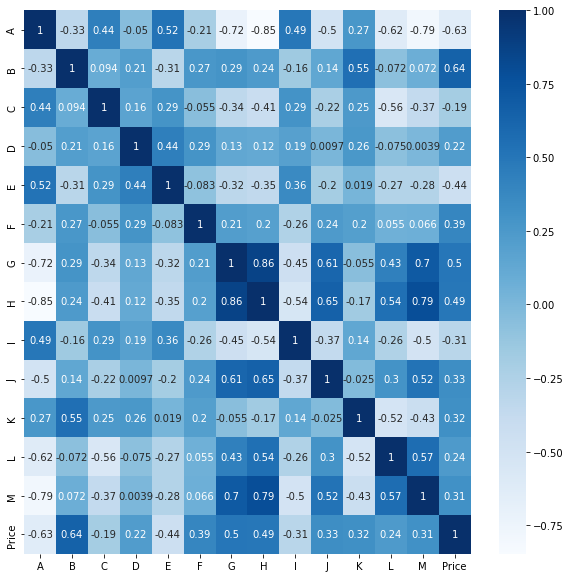

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

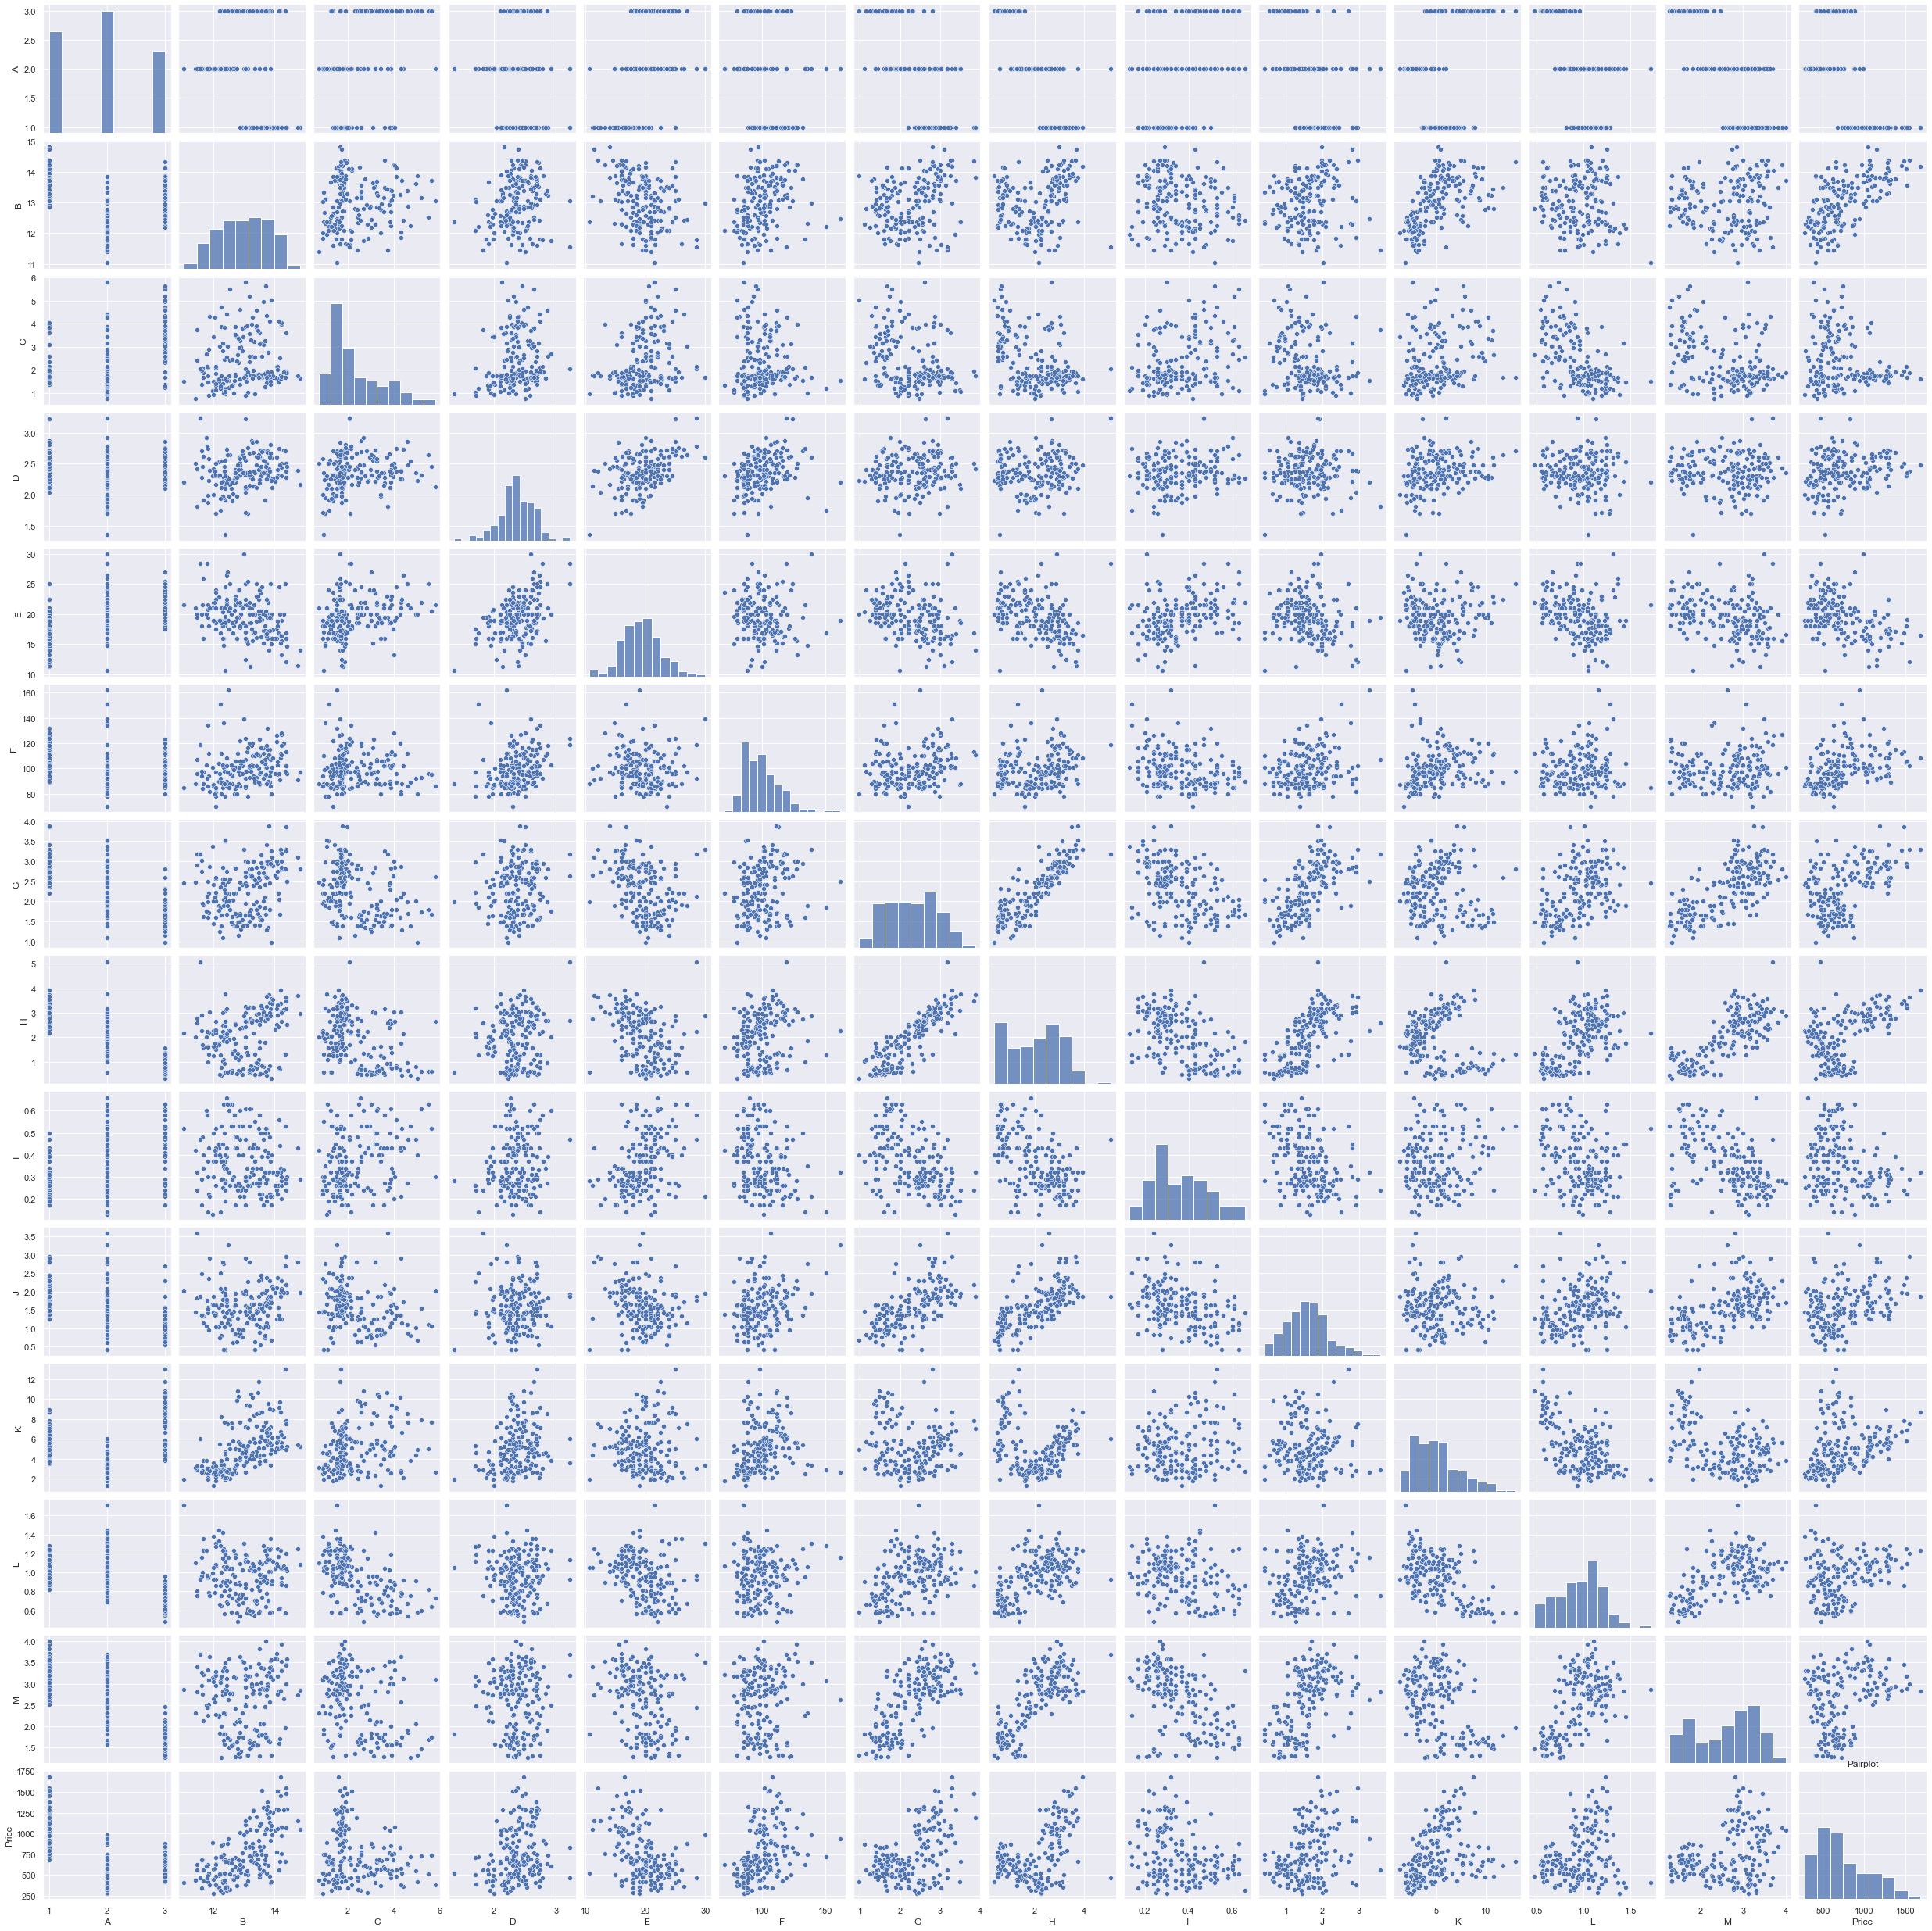

In [109]:
#pairplot
sns.pairplot(df)
plt.title('Pairplot')
plt.show()

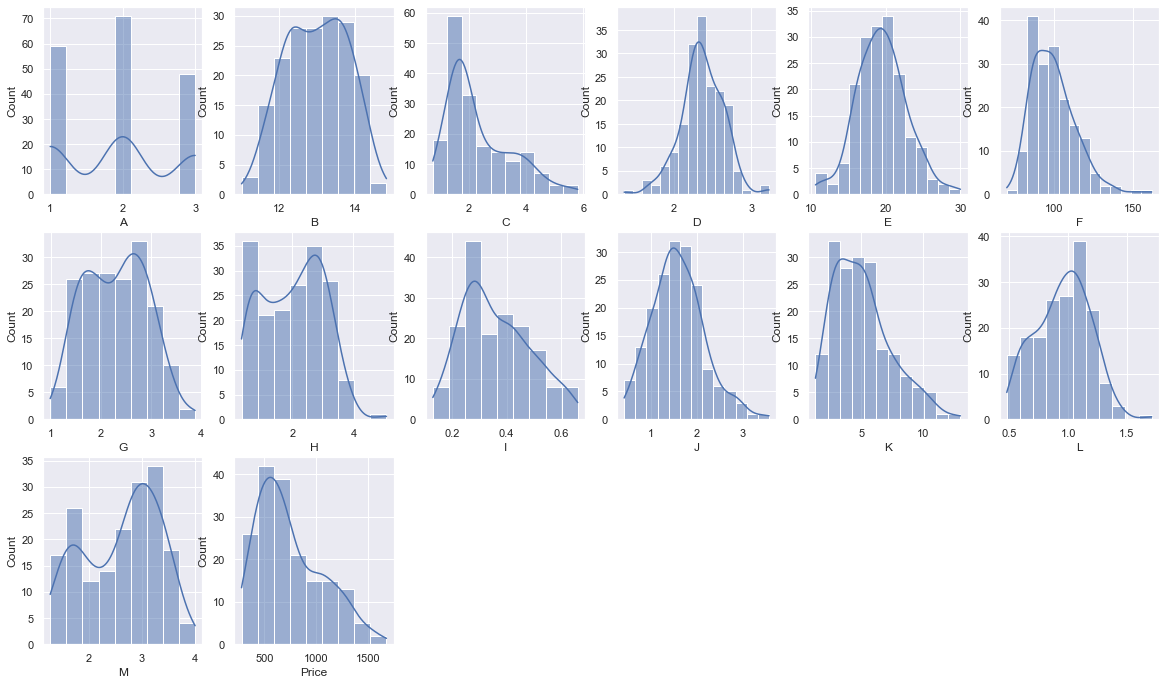

In [58]:
plt.figure(figsize = (20, 20))
sns.set(style="darkgrid")
plotnumber = 1
for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
    plotnumber += 1
plt.show()

In [91]:
#Storing the variables to find outlier

x = ['A','B','C','D','E','F','G','H','I','J','K','L','M','Price']

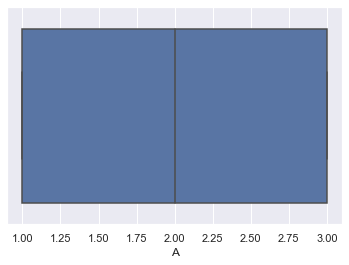

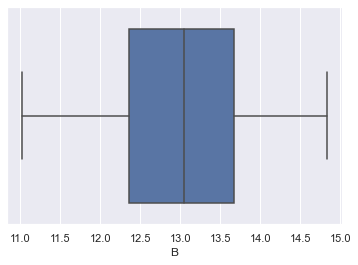

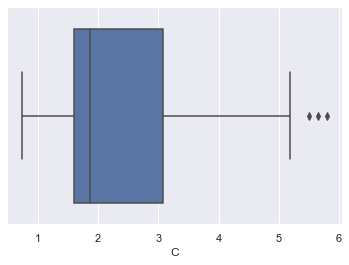

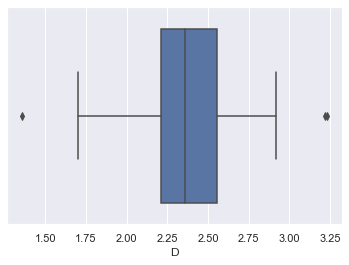

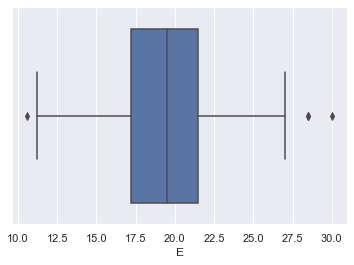

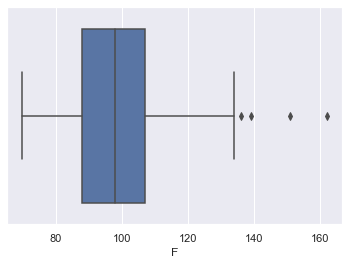

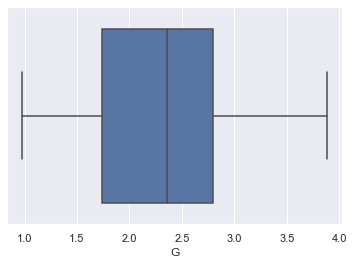

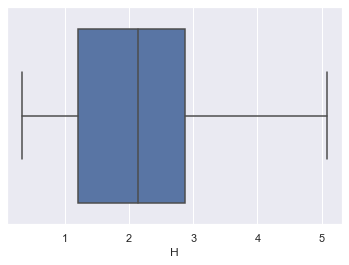

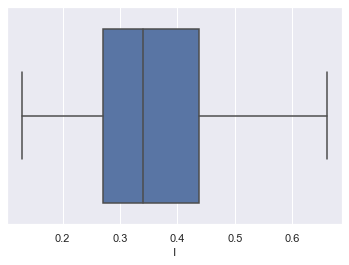

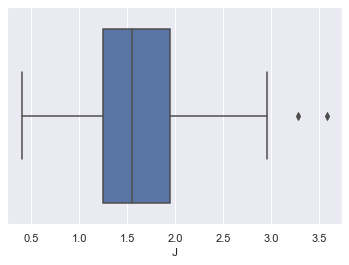

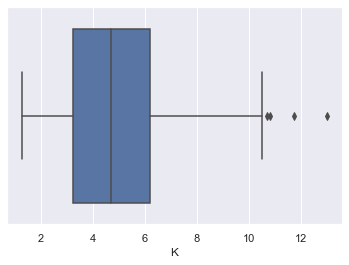

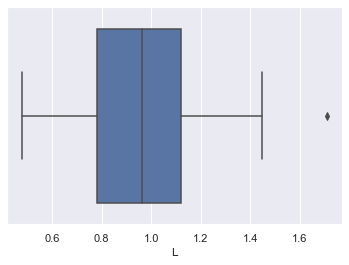

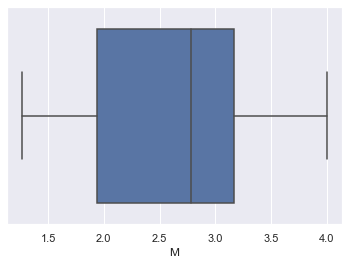

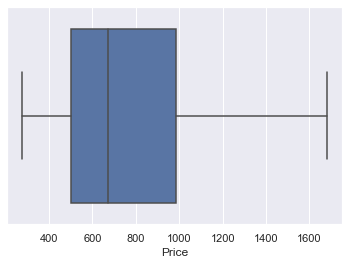

In [92]:
#Finding outliers

for i in x:
  sns.boxplot(x = i, data = df)
  plt.show()


In [60]:
#Storing in the variable called x
X = df.loc[:,['A','B','C','D','E','F','G','H','I','J','K','L','M','Price']].values

In [61]:
print(X.shape)

(178, 14)


In [70]:
from sklearn.neighbors import NearestNeighbors

In [71]:
neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(X)
distances,indices = nbrs.kneighbors(X)

In [72]:
#Compute data proximity from each other using Nearest Neighbours 
from sklearn.neighbors import NearestNeighbors # importing the library 
neighb = NearestNeighbors (n_neighbors=2) 
# creating an object of the NearestNeighbors class nbrs-neighb.fit(x) 
# fitting the data to the object 
distances, indices=nbrs.kneighbors(X) # finding the nearest neighbours

In [64]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(X)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

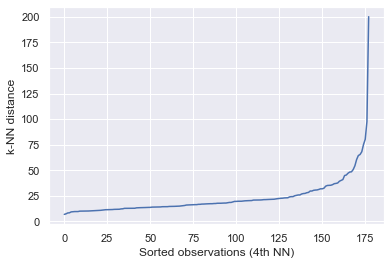

In [65]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [66]:
from kneed import KneeLocator

In [67]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

64.39668003864796


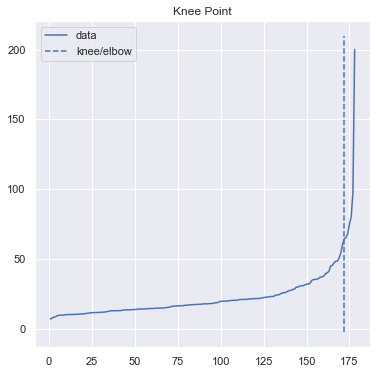

In [68]:
kneedle.plot_knee()
plt.show()

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


In [111]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [112]:
model=DBSCAN(eps=0.1,min_samples=5).fit(X)
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [116]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X)

DBSCAN(eps=0.4, min_samples=20)

In [117]:
y_pred = db.fit_predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [126]:
#DBSCAN


from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 4.54, min_samples = 4).fit(X)
# get cluster labels
clusters.labels_
# output
#array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
# -1 value represents noisy points could not assigned to any cluster

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [128]:
from collections import Counter
Counter(clusters.labels_)
# output
Counter({1: 1524, 0: 870, 2: 769, 3: 301, 7: 283, 5: 246, 6: 232, 4: 153, 8: 11, 10: 8, 9: 6, -1: 3})

Counter({1: 1524,
         0: 870,
         2: 769,
         3: 301,
         7: 283,
         5: 246,
         6: 232,
         4: 153,
         8: 11,
         10: 8,
         9: 6,
         -1: 3})

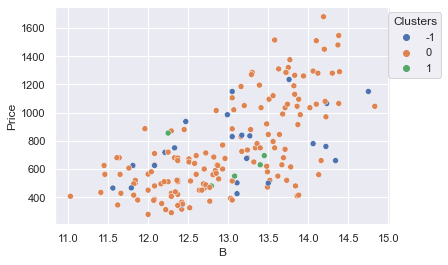

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df, x = "B", y = "Price", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [ ]:
now we can see the clusters i.e for B and Price and in DBSCAN we dont remove outlier 
we handle using it and finally we got the cluster part.

# Hierarchical Clustering

In [127]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,Price
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [146]:
#Storing the variables to find outlier

x = ['A','B','C','D','E','F','G','H','I','J','K','L','M','Price']

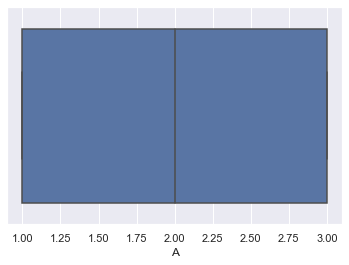

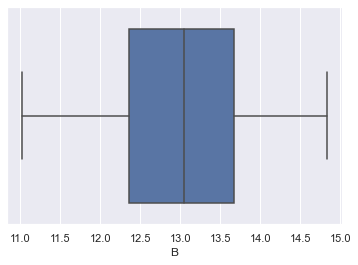

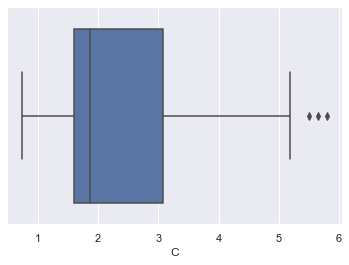

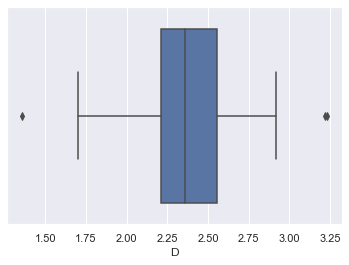

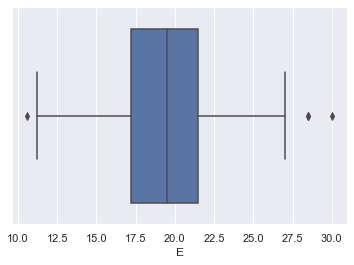

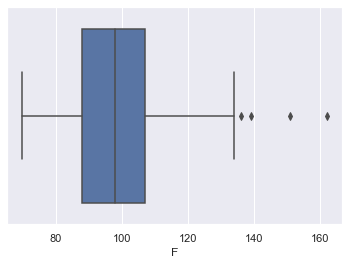

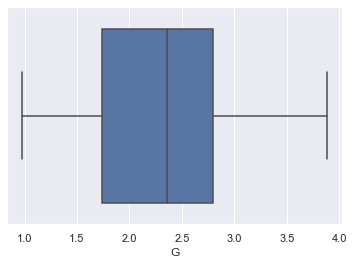

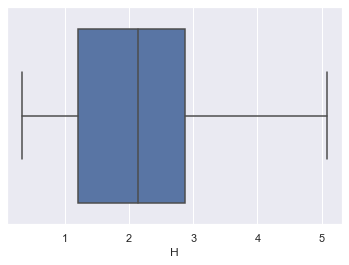

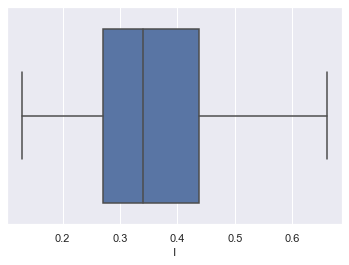

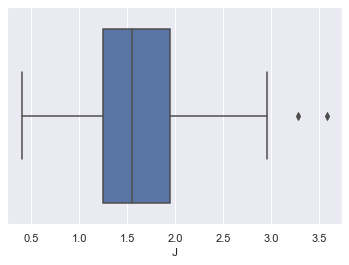

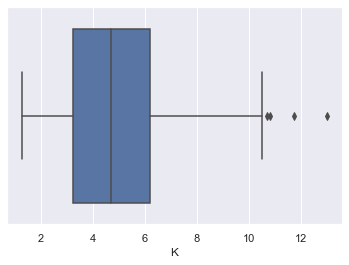

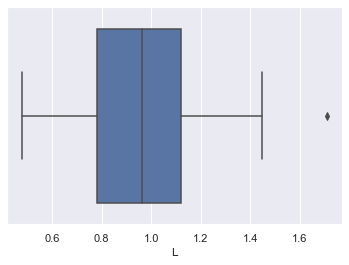

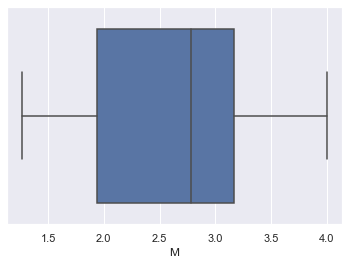

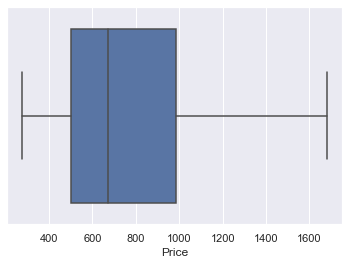

In [147]:
#Finding outliers

for i in x:
  sns.boxplot(x = i, data = df)
  plt.show()


In [150]:
#Treating thr outlier with IQR
for i in x:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  ul = Q3 + 1.5 * IQR
  ll = Q1 - 1.5 * IQR
  df[df[i] > ul]
  df[df[i] < ll]

  df[i] = np.where(df[i] > ul, ul, np.where(df[i] < ll, ll, df[i]))

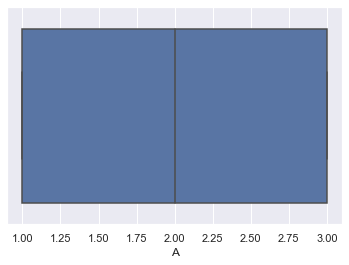

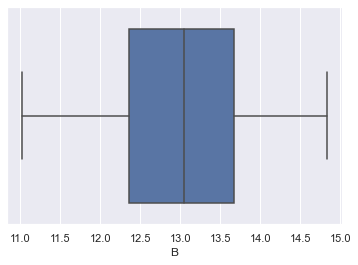

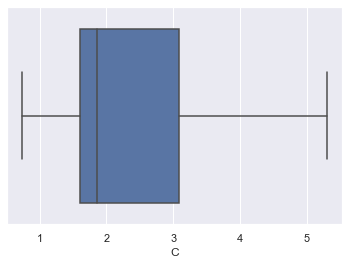

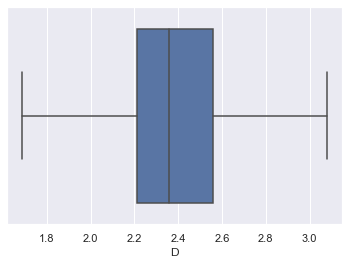

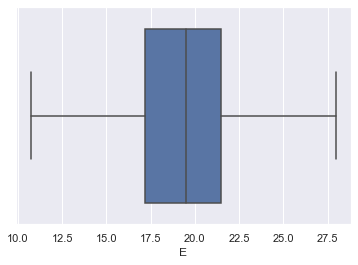

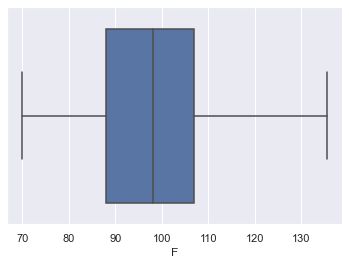

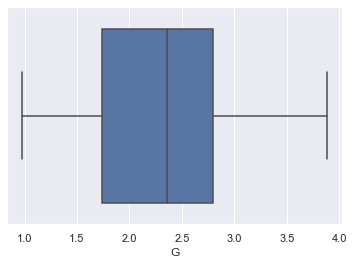

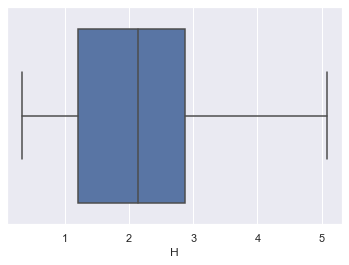

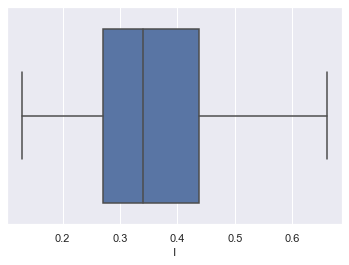

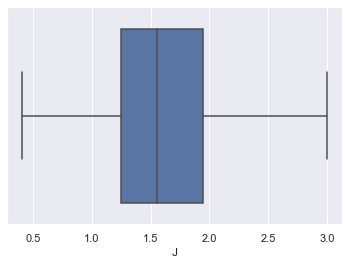

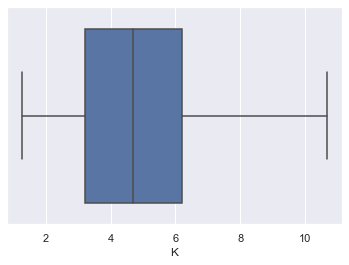

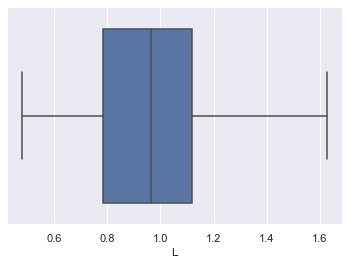

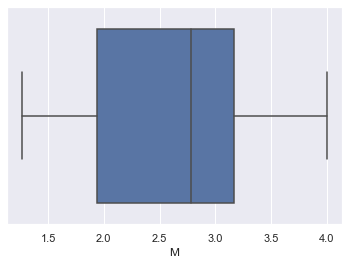

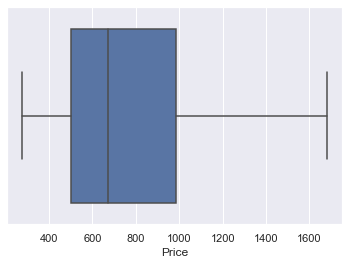

In [151]:
#No outliers

for i in x:
  sns.boxplot(x = i, data = df)
  plt.show()

In [152]:
df.nunique()

A          3
B        126
C        131
D         78
E         62
F         50
G         97
H        132
I         39
J        100
K        129
L         78
M        122
Price    121
dtype: int64

In [153]:
#Splitting feature and target

X=df.drop(['A'],axis=1)
y=df['A']

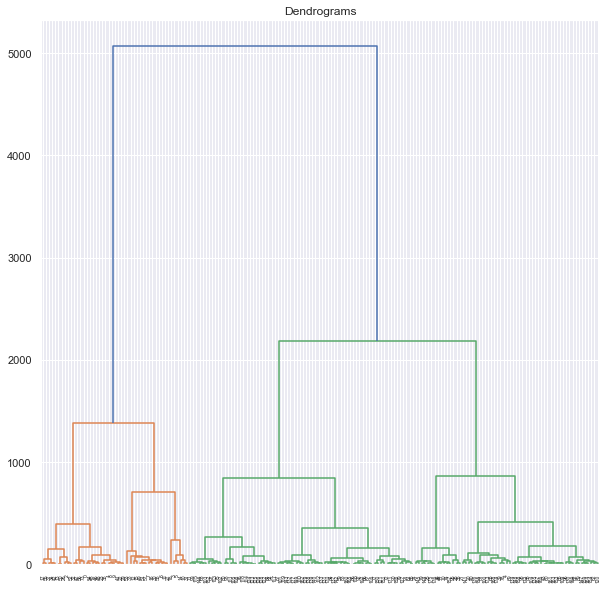

In [154]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

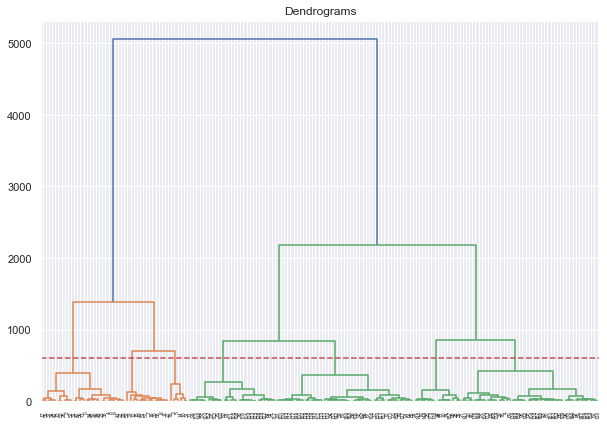

In [155]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=600, color='r', linestyle='--')

In [156]:
#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [157]:
predicted_labels = cluster.labels_

In [158]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted_labels)
cm

array([[ 0,  0,  0,  0],
       [13, 46,  0,  0],
       [70,  1,  0,  0],
       [48,  0,  0,  0]], dtype=int64)

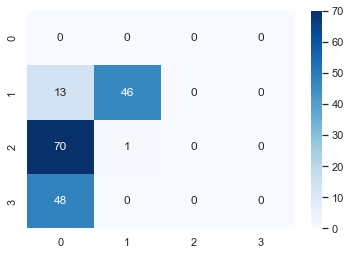

In [159]:
sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y, predicted_labels)

0.25842696629213485

In [ ]:
The acc is too low in hierarchical clustering becoz i have selected target variable has A  
thats the reason the accuracy is low .